In [1]:
from os import walk
from PIL import Image
import numpy as np
from numpy import asarray
import matplotlib
import matplotlib.pyplot as plt
import cv2

tomato3_path = '../Datasets/train/Tomato 3/'

filenames = next(walk(tomato3_path), (None, None, []))[2]  # [] if no file

img = Image.open(tomato3_path + filenames[0])

default_img = asarray(img)

default_channel = asarray(img)


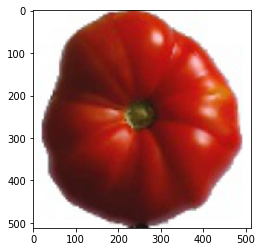

In [2]:
# Displaying default image
plt.imshow(default_img, interpolation='nearest')

In [3]:
# Changing all white pixels to black on the image
# We use this way instead of range as it is more performant
for array in default_channel: 
    for pixel in array:
        if(
            (pixel[0] < 256 and pixel[0] > 200) and
            (pixel[1] < 256 and pixel[1] > 200) and
            (pixel[2] < 256 and pixel[2] > 200)):
                pixel[0] = 0
                pixel[1] = 0
                pixel[2] = 0
                
red_channel = default_channel.copy()            
blue_channel = default_channel.copy()
green_channel = default_channel.copy()            

for array in red_channel:
    for pixel in array:
        pixel[1] = 0
        pixel[2] = 0
            
for array in blue_channel:
    for pixel in array:
        pixel[0] = 0
        pixel[1] = 0
            
for array in green_channel:
    for pixel in array:
        pixel[0] = 0
        pixel[2] = 0
            
# Hvor alle tre kolonner er 255 sæt til 0 (hvid til sort)
# Split hver kolonne til et nyt np array med kun værdier fra den valgte kolonne
# Kolonne1: R, Kolonne2: G, Kolonne3: B


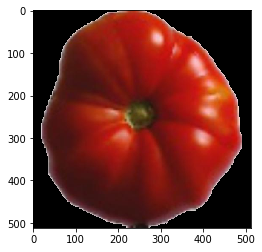

In [4]:
# Displaying default channel
plt.imshow(default_channel, interpolation='nearest')

# Displaying blue channel
#plt.imshow(blue_channel, interpolation='nearest')

# Displaying green channel
#plt.imshow(green_channel, interpolation='nearest')

# Displaying red channel
#plt.imshow(red_channel, interpolation='nearest')